In [1]:
import pandas as pd
import numpy as np

In [2]:
data_sayisi = 10000

In [3]:
# Sample data generation for customer segmentation
np.random.seed(42)

data = {
    'CustomerID': range(1, data_sayisi + 1),
    'Age': np.random.randint(18, 70, size=data_sayisi),
    'Gender': np.random.choice(['Male', 'Female'], size=data_sayisi),
    'TotalSpending': np.random.uniform(100, 10000, size=data_sayisi).round(2),
    'PurchaseFrequency': np.random.randint(1, 50, size=data_sayisi),
    'AverageOrderValue': np.random.uniform(10, 1000, size=data_sayisi).round(2),
    'ReturnedItems': np.random.randint(0, 10, size=data_sayisi)
}

# Generating a sample label for classification
labels = ['Loyal', 'Potential', 'One-time', 'Lost']
data['CustomerType'] = np.random.choice(labels, size=data_sayisi, p=[0.3, 0.3, 0.2, 0.2])

data

{'CustomerID': range(1, 10001),
 'Age': array([56, 69, 46, ..., 57, 64, 32], dtype=int32),
 'Gender': array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
       dtype='<U6'),
 'TotalSpending': array([1369.48, 2725.29, 8368.93, ..., 3668.55, 4784.33, 5660.76]),
 'PurchaseFrequency': array([28,  3,  7, ..., 27, 10, 43], dtype=int32),
 'AverageOrderValue': array([623.91, 409.7 , 295.78, ...,  33.3 , 488.39, 430.59]),
 'ReturnedItems': array([4, 2, 7, ..., 1, 1, 6], dtype=int32),
 'CustomerType': array(['Loyal', 'Potential', 'Potential', ..., 'Potential', 'Loyal',
        'Loyal'], dtype='<U9')}

In [4]:
df = pd.DataFrame(data)

df

,CustomerID,Age,Gender,TotalSpending,PurchaseFrequency,AverageOrderValue,ReturnedItems,CustomerType
0,1,56,Male,1369.48,28,623.91,4,Loyal
1,2,69,Female,2725.29,3,409.70,2,Potential
2,3,46,Female,8368.93,7,295.78,7,Potential
3,4,32,Female,3338.21,14,811.22,9,One-time
4,5,60,Male,4931.80,15,77.60,5,Potential
...,...,...,...,...,...,...,...,...
9995,9996,55,Male,9342.93,40,486.19,1,Loyal
9996,9997,51,Female,3174.24,5,218.10,5,Potential
9997,9998,57,Female,3668.55,27,33.30,1,Potential
9998,9999,64,Male,4784.33,10,488.39,1,Loyal


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Veri ön işleme: Kategorik değişkenleri ve özellikleri hazırlama
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Gender column encoding
df['CustomerType'] = LabelEncoder().fit_transform(df['CustomerType'])  # CustomerType column encoding

df

,CustomerID,Age,Gender,TotalSpending,PurchaseFrequency,AverageOrderValue,ReturnedItems,CustomerType
0,1,56,1,1369.48,28,623.91,4,1
1,2,69,0,2725.29,3,409.70,2,3
2,3,46,0,8368.93,7,295.78,7,3
3,4,32,0,3338.21,14,811.22,9,2
4,5,60,1,4931.80,15,77.60,5,3
...,...,...,...,...,...,...,...,...
9995,9996,55,1,9342.93,40,486.19,1,1
9996,9997,51,0,3174.24,5,218.10,5,3
9997,9998,57,0,3668.55,27,33.30,1,3
9998,9999,64,1,4784.33,10,488.39,1,1


In [7]:
# Özellikler ve hedef değişken
X = df[['Age', 'Gender', 'TotalSpending', 'PurchaseFrequency', 'AverageOrderValue', 'ReturnedItems']]
y = df['CustomerType']

In [8]:
# Veriyi eğitim ve test setlerine ayırma
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,Age,Gender,TotalSpending,PurchaseFrequency,AverageOrderValue,ReturnedItems
4896,32,1,2885.25,39,166.61,0
4782,40,1,4724.33,22,73.03,2
1496,54,1,5956.14,7,679.01,6
1957,28,1,547.77,35,844.88,0
9171,68,0,7629.29,27,574.07,7
...,...,...,...,...,...,...
5734,59,1,725.92,23,206.13,3
5191,49,0,2134.83,29,466.36,1
5390,39,0,3805.94,6,176.78,9
860,51,0,7520.31,1,240.09,1


In [9]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

((9000, 6), (1000, 6))

In [10]:
# 1. Lojistik Regresyon Modeli
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [11]:
example_customer_info = [[35, 1, 200, 1, 100, 2]]
example_customer_info = scaler.transform(example_customer_info)

tahmin = log_reg.predict(example_customer_info)
# tahmin edilen müşteri tipi 0: Loyal, 1: Lost, 2: One-time, 3: Potential
tahmin

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3])

In [12]:
X_test_df

,Age,Gender,TotalSpending,PurchaseFrequency,AverageOrderValue,ReturnedItems
6252,47,0,1482.42,8,56.39,1
4684,44,1,825.83,42,984.06,7
1731,23,1,3647.84,12,285.13,5
4742,38,1,3772.14,47,446.07,3
4521,54,0,8834.58,11,61.91,2
...,...,...,...,...,...,...
3921,59,1,8289.15,8,333.53,8
6685,34,0,4250.45,6,410.88,6
3194,68,0,3723.55,40,68.97,6
1941,34,0,9951.02,17,824.51,8


In [13]:
y_test.to_list()

[1,
 3,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 3,
 3,
 0,
 1,
 0,
 1,
 1,
 3,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 3,
 1,
 0,
 3,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 3,
 2,
 3,
 1,
 0,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 0,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 3,
 2,
 3,
 1,
 2,
 0,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 0,
 3,
 1,
 2,


In [14]:
# 2. Karar Ağacı Modeli
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

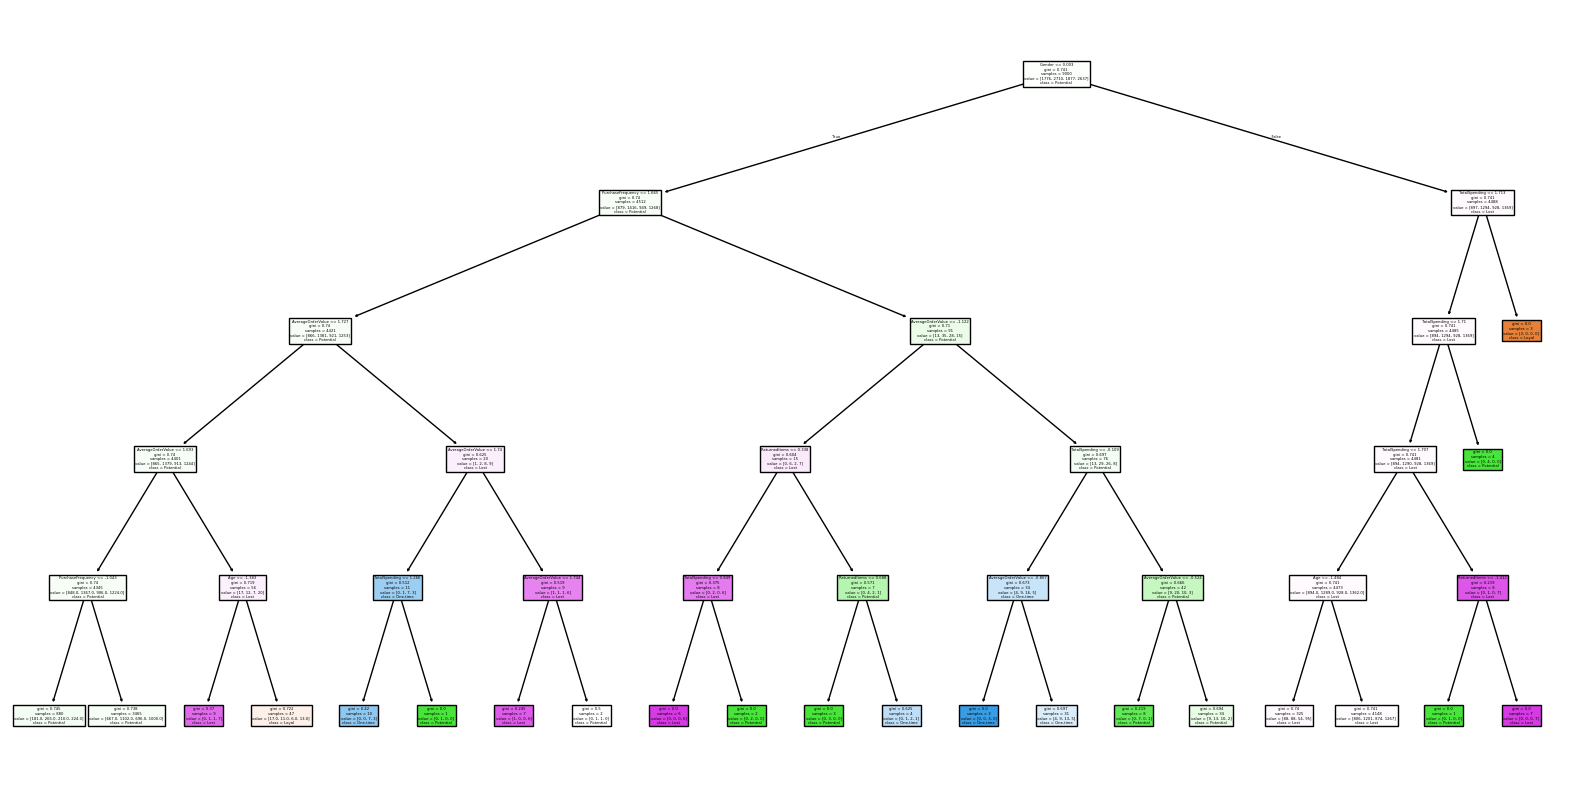

In [15]:
# Draw the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=labels)
plt.show()

In [16]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree

array([1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 0, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1,

In [17]:
y_test.to_list()

[1,
 3,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 3,
 3,
 0,
 1,
 0,
 1,
 1,
 3,
 2,
 0,
 1,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 3,
 1,
 0,
 3,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 3,
 2,
 3,
 1,
 0,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 0,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 3,
 2,
 3,
 1,
 2,
 0,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 0,
 1,
 0,
 3,
 1,
 2,


In [29]:
# Performans değerlendirme
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

NameError: name 'y_pred_log_reg' is not defined

In [30]:
# show the results
print('Logistic Regression Model:')
print(log_reg_report)
print('Accuracy:', log_reg_accuracy)
print('Decision Tree Model:')
print(tree_report)
print('Accuracy:', tree_accuracy)

Logistic Regression Model:


NameError: name 'log_reg_report' is not defined

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.31      0.58      0.40       302
           2       0.00      0.00      0.00       199
           3       0.32      0.46      0.38       307

    accuracy                           0.32      1000
   macro avg       0.16      0.26      0.20      1000
weighted avg       0.19      0.32      0.24      1000

Accuracy: 0.316
Decision Tree Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.31      0.51      0.39       302
           2       0.17      0.01      0.01       199
           3       0.32      0.52      0.40       307

    accuracy                           0.31      1000
   macro avg       0.20      0.26      0.20      1000
weighted avg       0.23      0.31      0.24      1000

Accuracy: 0.314

In [26]:
# draw the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Logistic Regression Model')
plt.show()

NameError: name 'y_pred_log_reg' is not defined

<Figure size 1000x500 with 0 Axes>

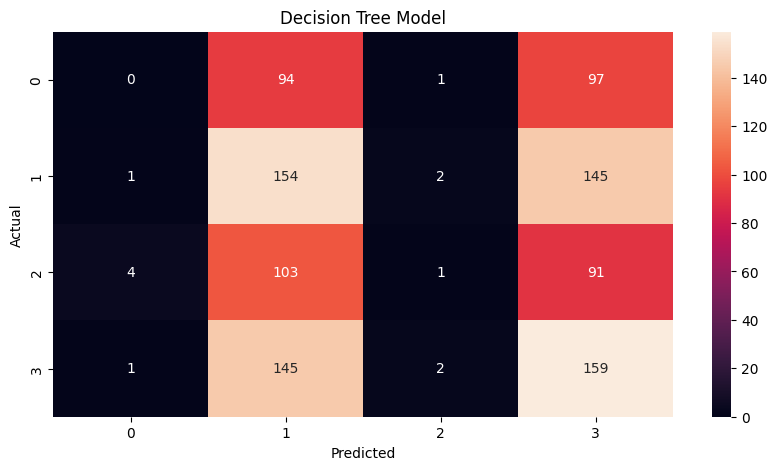

In [25]:
# draw the results
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Decision Tree Model')
plt.show()